In [ ]:
## Download relevant data+models for testing MDTerp

import urllib.request
import zipfile
import os

url = "https://figshare.com/ndownloader/articles/30351334/versions/7"
filename = "MDTerp_files.zip"

urllib.request.urlretrieve(url, filename)
print(f"Downloaded {filename}")

zip_path = "MDTerp_files.zip"
extract_dir = "./"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

In [1]:
# MDTerp step 1: Load alanine dipeptide in vacuum simulation trajectory (φ, ψ, θ, ω) and convert into sine/cosines since the VAMPNets model was trained using these 8 features

import numpy as np
import os

result_dir = './results/'
os.makedirs(result_dir, exist_ok = True)

traj_ntl9 = np.load('MDTerp_files/data_model/SPIB_ntl9_trajectory.npy')

In [2]:
# MDTerp step 2: Create feature dictionary

numeric_dict = {}
numeric_dict["d_5_328"] = [0]
numeric_dict["d_5_342"] = [1]
numeric_dict["d_5_358"] = [2]
numeric_dict["d_5_368"] = [3]
numeric_dict["d_22_306"] = [4]
numeric_dict["d_22_328"] = [5]
numeric_dict["d_22_614"] = [6]
numeric_dict["d_44_287"] = [7]
numeric_dict["d_44_306"] = [8]
numeric_dict["d_44_580"] = [9]
numeric_dict["d_44_599"] = [10]
numeric_dict["d_44_614"] = [11]
numeric_dict["d_60_272"] = [12]
numeric_dict["d_60_287"] = [13]
numeric_dict["d_60_306"] = [14]
numeric_dict["d_60_570"] = [15]
numeric_dict["d_60_580"] = [16]
numeric_dict["d_60_614"] = [17]
numeric_dict["d_79_221"] = [18]
numeric_dict["d_79_243"] = [19]
numeric_dict["d_79_265"] = [20]
numeric_dict["d_79_272"] = [21]
numeric_dict["d_79_570"] = [22]
numeric_dict["d_99_243"] = [23]
numeric_dict["d_99_265"] = [24]
numeric_dict["d_99_570"] = [25]
numeric_dict["d_118_221"] = [26]
numeric_dict["d_118_243"] = [27]
numeric_dict["d_118_551"] = [28]
numeric_dict["d_140_214"] = [29]
numeric_dict["d_140_221"] = [30]
numeric_dict["d_140_243"] = [31]
numeric_dict["d_152_214"] = [32]
numeric_dict["d_380_432"] = [33]
numeric_dict["d_387_446"] = [34]
numeric_dict["d_408_466"] = [35]
numeric_dict["d_408_485"] = [36]
numeric_dict["d_418_485"] = [37]
numeric_dict["d_446_527"] = [38]
numeric_dict["d_466_544"] = [39]
numeric_dict["d_466_551"] = [40]
numeric_dict["d_466_570"] = [41]
numeric_dict["d_7_370"] = [42]
numeric_dict["d_7_410"] = [43]
numeric_dict["d_24_616"] = [44]
numeric_dict["d_46_572"] = [45]
numeric_dict["d_62_289"] = [46]
numeric_dict["d_62_616"] = [47]
numeric_dict["d_81_572"] = [48]
numeric_dict["d_120_553"] = [49]
numeric_dict["d_410_468"] = [50]
numeric_dict["d_468_553"] = [51]
numeric_dict["d_468_572"] = [52]
numeric_dict["d_10_373"] = [53]

sin_cos_dict = {}
sin_cos_dict["φ_0"] = [54, 75]
sin_cos_dict["φ_1"] = [55, 76]
sin_cos_dict["φ_2"] = [56, 77]
sin_cos_dict["φ_3"] = [57, 78]
sin_cos_dict["φ_16"] = [58, 79]
sin_cos_dict["φ_17"] = [59, 80]
sin_cos_dict["φ_18"] = [60, 81]
sin_cos_dict["φ_21"] = [61, 82]
sin_cos_dict["φ_22"] = [62, 83]
sin_cos_dict["φ_23"] = [63, 84]
sin_cos_dict["φ_24"] = [64, 85]
sin_cos_dict["φ_25"] = [65, 86]
sin_cos_dict["φ_26"] = [66, 87]
sin_cos_dict["φ_27"] = [67, 88]
sin_cos_dict["φ_28"] = [68, 89]
sin_cos_dict["φ_29"] = [69, 90]
sin_cos_dict["φ_30"] = [70, 91]
sin_cos_dict["φ_31"] = [71, 92]
sin_cos_dict["φ_34"] = [72, 93]
sin_cos_dict["φ_35"] = [73, 94]
sin_cos_dict["φ_36"] = [74, 95]

sin_cos_dict["ψ_0"] = [96, 117]
sin_cos_dict["ψ_1"] = [97, 118]
sin_cos_dict["ψ_2"] = [98, 119]
sin_cos_dict["ψ_3"] = [99, 120]
sin_cos_dict["ψ_16"] = [100, 121]
sin_cos_dict["ψ_17"] = [101, 122]
sin_cos_dict["ψ_18"] = [102, 123]
sin_cos_dict["ψ_21"] = [103, 124]
sin_cos_dict["ψ_22"] = [104, 125]
sin_cos_dict["ψ_23"] = [105, 126]
sin_cos_dict["ψ_24"] = [106, 127]
sin_cos_dict["ψ_25"] = [107, 128]
sin_cos_dict["ψ_26"] = [108, 129]
sin_cos_dict["ψ_27"] = [109, 130]
sin_cos_dict["ψ_28"] = [110, 131]
sin_cos_dict["ψ_29"] = [111, 132]
sin_cos_dict["ψ_30"] = [112, 133]
sin_cos_dict["ψ_31"] = [113, 134]
sin_cos_dict["ψ_34"] = [114, 135]
sin_cos_dict["ψ_35"] = [115, 136]
sin_cos_dict["ψ_36"] = [116, 137]

In [3]:
# MDTerp step 3: Import MDTerp.base and implement MDTerp using base.run(). Two required arguments are the dataset and the location of a Python function that loads a black-box model. Go to https://github.com/shams-mehdi/MDTerp/tree/main/examples to check how this Python file should be like.

import MDTerp.base as base

model_function_loc = 'MDTerp_files/scripts/MDTerp_script_SPIB_ntl9.txt'
base.run(traj_ntl9, model_function_loc, save_dir = result_dir, numeric_dict = numeric_dict, sin_cos_dict = sin_cos_dict , point_max = 50, prob_threshold = 0.49, num_samples = 50000, cutoff = 15)

10-18-25 13:50:49 initialization  INFO     ----------------------------------------------------------------------------------------------------
10-18-25 13:50:49 initialization  INFO     Starting MDTerp...
10-18-25 13:50:49 initialization  INFO     ----------------------------------------------------------------------------------------------------
10-18-25 13:50:49 initialization  INFO     MDTerp result location >>> ./results/
10-18-25 13:50:49 initialization  INFO     Defined numeric features >>> 54
10-18-25 13:50:49 initialization  INFO     Defined angle features >>> 0
10-18-25 13:50:49 initialization  INFO     Defined sin_cos features >>> 42
10-18-25 13:50:49 initialization  INFO     Number of samples in blackbox model training data >>> 150000
10-18-25 13:50:49 initialization  INFO     Number of columns in blackbox model training data >>> 138
10-18-25 13:50:49 initialization  INFO     ---------------------------------------------------------------------------------------------------

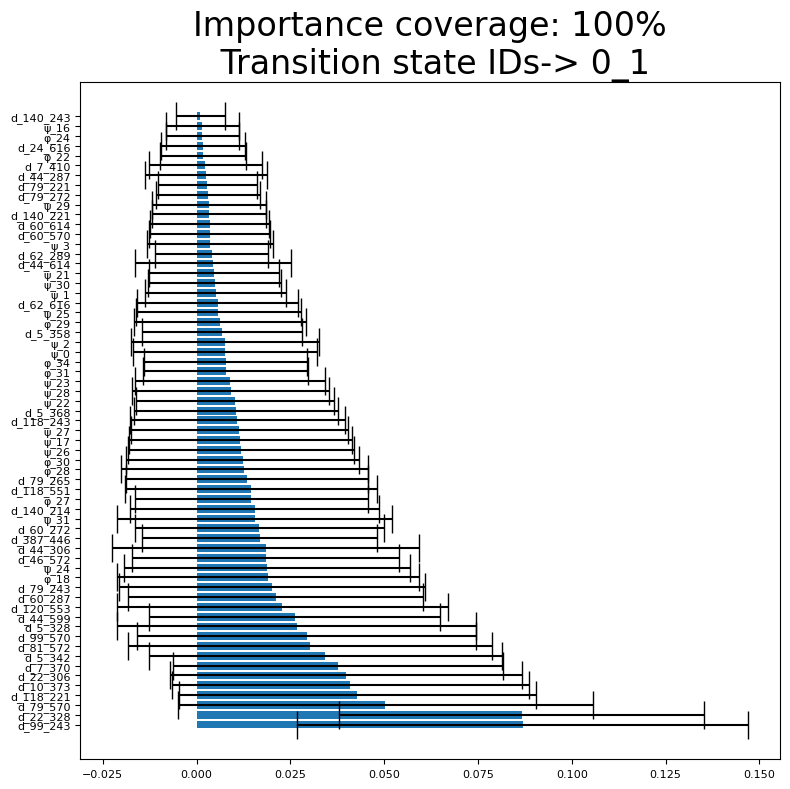

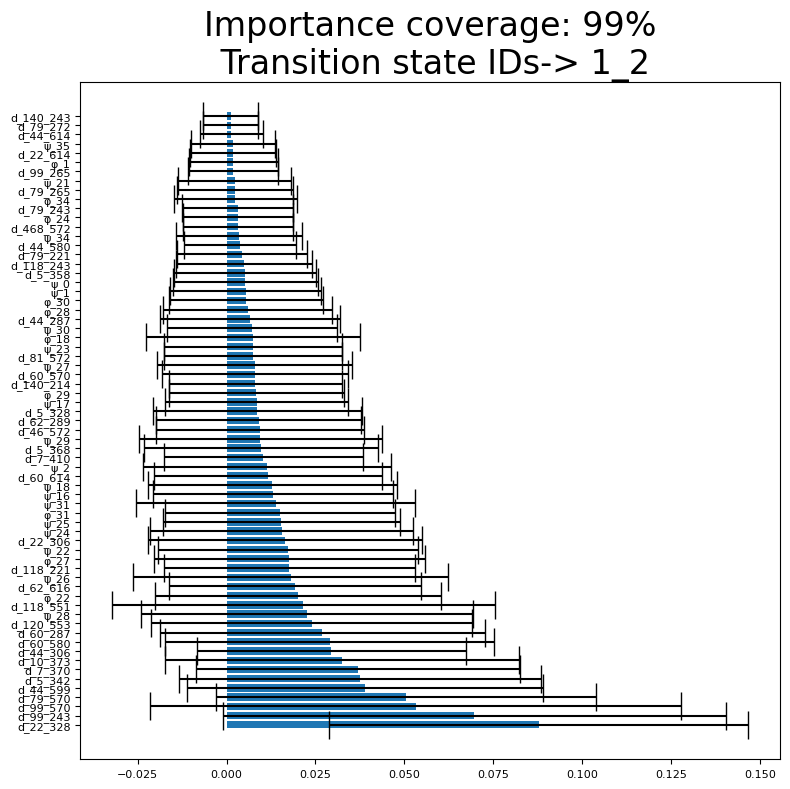

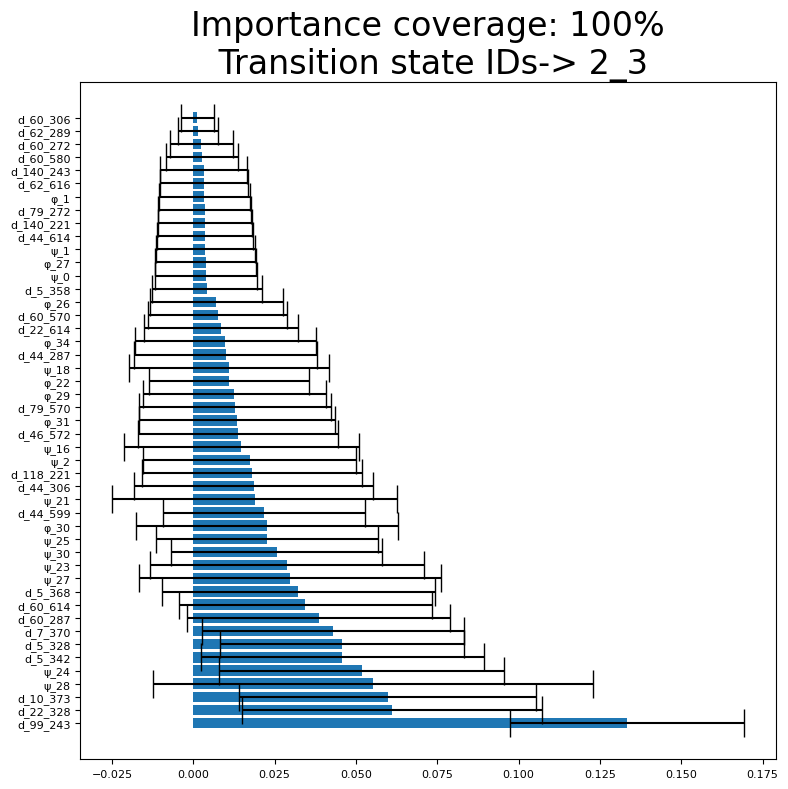

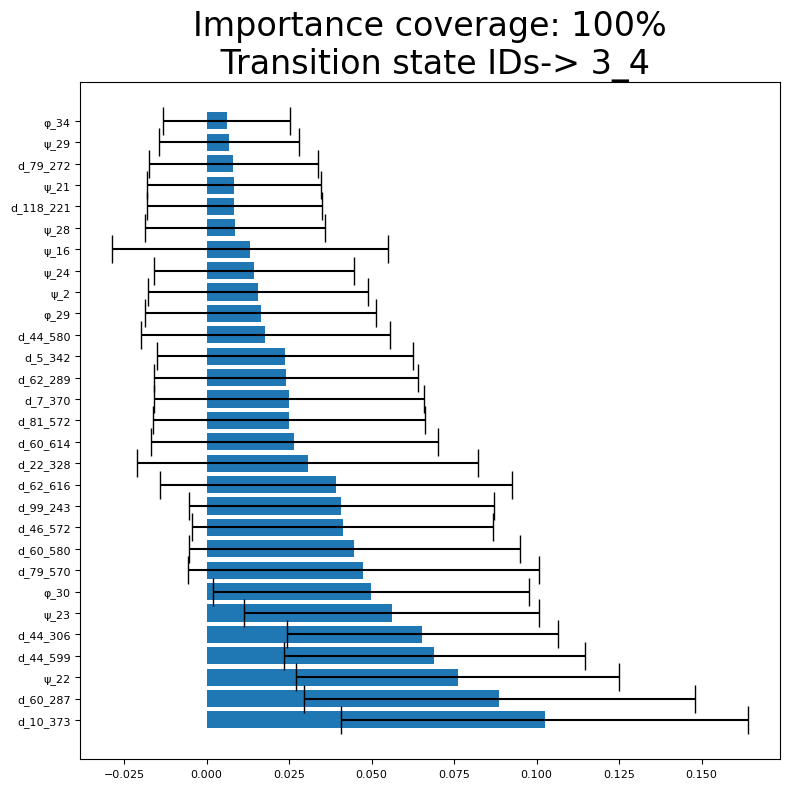

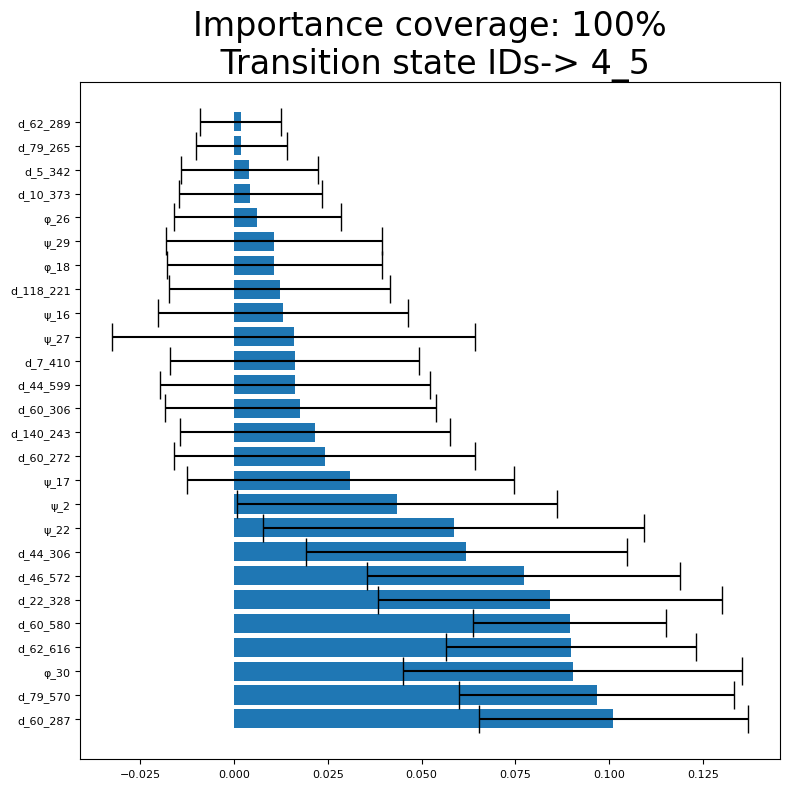

In [5]:
# MDTerp step 3: Summarize feature importance for each of the transition states.
import matplotlib.pyplot as plt
from MDTerp.utils import transition_summary

feature_names_loc = result_dir + 'MDTerp_feature_names.npy'
feature_names = np.load(feature_names_loc)
all_result_loc = result_dir + 'MDTerp_results_all.pkl'

# summary is a dictionary with individual keys for each class transition in the dataset. Each key has the mean and standard deviation of feature importance for all explanations generated for that transition
summary = transition_summary(all_result_loc, importance_coverage = 1.00)

# Loop over all the transitions
for ii in summary:
    ordered_nonzero_indices = np.argsort(summary[ii][0])[::-1][:np.nonzero(summary[ii][0])[0].shape[0]]
    
    ordered_mean = summary[ii][0][ordered_nonzero_indices]
    ordered_std = summary[ii][1][ordered_nonzero_indices]
    
    fig, ax = plt.subplots(figsize = (8,8))
    ax.barh(np.arange(ordered_mean.shape[0]), ordered_mean, xerr = ordered_std, capsize = 10)
    ax.set_title('Importance coverage: ' + str(int(100*np.sum(ordered_mean))) + '%' + '\n Transition state IDs-> ' + ii, fontsize = 24)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_yticks(np.arange(ordered_nonzero_indices.shape[0]))
    ax.set_yticklabels(np.array(feature_names)[ordered_nonzero_indices])
    fig.tight_layout()

In [5]:
# For all the investigated points, fetch n_th dominant features (n = 0 is most dominant).
from MDTerp.utils import dominant_feature
dominant_feature(all_result_loc, n = 0)

{np.int64(78835): np.int64(5),
 np.int64(77484): np.int64(23),
 np.int64(80111): np.int64(23),
 np.int64(62859): np.int64(28),
 np.int64(13493): np.int64(77),
 np.int64(22440): np.int64(25),
 np.int64(77320): np.int64(88),
 np.int64(103615): np.int64(5),
 np.int64(12517): np.int64(5),
 np.int64(79221): np.int64(5),
 np.int64(64940): np.int64(87),
 np.int64(869): np.int64(89),
 np.int64(94574): np.int64(5),
 np.int64(64844): np.int64(92),
 np.int64(11708): np.int64(23),
 np.int64(94550): np.int64(89),
 np.int64(76971): np.int64(49),
 np.int64(23883): np.int64(79),
 np.int64(23952): np.int64(28),
 np.int64(73143): np.int64(87),
 np.int64(13341): np.int64(23),
 np.int64(76930): np.int64(83),
 np.int64(80446): np.int64(23),
 np.int64(77454): np.int64(1),
 np.int64(73221): np.int64(87),
 np.int64(143895): np.int64(53),
 np.int64(143905): np.int64(53),
 np.int64(50777): np.int64(13),
 np.int64(40022): np.int64(77),
 np.int64(136824): np.int64(83),
 np.int64(39576): np.int64(70),
 np.int64(50